In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from scipy.stats import chisquare



# load the excel 

In [2]:
df = pd.read_excel('Final1214.xls', sheet_name='일반')


## shuffer the records 

In [68]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

In [69]:
df

,단어,범주,형태고정,기쁘다,슬프다,희망적이다,두렵다,자부를느끼다,수치스럽다,만족하다,...,화나다,좋다,싫다,재미있다/웃기다,감동적이다,불쌍하다,밝다,유치하다(0/1),상스럽다(0/1),외설적이다(0/1)
0,물욕 좇다,확장용언,0,2,3,2,2,2,2,0,...,2,2,3,2,2,3,2,2,2,2
1,아낌 없다,확장용언,0,3,2,2,2,2,2,4,...,2,4,0,2,2,2,3,2,2,2
2,빈자리,단순체언,0,0,3,1,2,2,2,0,...,2,2,3,2,2,3,0,2,2,2
3,배 부르다,확장용언,0,3,2,2,2,2,2,3,...,0,3,2,2,2,0,2,2,2,2
4,가치관 흔들리다,확장용언,0,0,3,1,2,1,2,1,...,3,0,4,2,2,2,0,2,2,2
5,눈물나는 걸 참을 수 없다,확장용언,0,1,4,2,2,2,2,2,...,2,0,4,2,2,2,1,2,2,2
6,간담 내려앉다,확장용언,0,1,4,2,3,2,2,1,...,2,0,3,2,2,2,1,2,2,2
7,분분하다,단순용언,0,1,3,2,2,2,2,1,...,2,1,3,2,2,2,1,2,2,2
8,공 세우다,확장용언,0,4,1,4,2,4,2,3,...,2,4,1,2,2,2,3,2,2,2
9,비 보슬보슬 내리다,확장용언,0,1,3,2,2,2,2,3,...,2,1,3,2,3,2,2,2,2,2


## Set the desired  labels 

In [134]:
emotions = ["놀라다/황당하다", "화나다", "슬프다", "두렵다", "수치스럽다","기쁘다"]


## extract the dataset

In [135]:
import numpy as np 
emo_records= {}
for i,record in df.iterrows():
    #print( record[emotions])
    #print( emotions[np.argmax(np.array(record[emotions]))])
    emo_records[record['단어']]=emotions[np.argmax(np.array(record[emotions]))]


## save the train dev test dataset

In [154]:
#visualize the distribution of labels
len(emo_records)

19073

In [157]:
f_train= open("train_emo.tsv","w")
f_dev= open("dev_emo.tsv","w")




In [158]:
for i,e in enumerate(emo_records.items()):
    if i<=int(len(emo_records)*(8/10)):
        f_train.write(e[0]+'\t'+e[1]+'\n')
    else:
        f_dev.write(e[0]+'\t'+e[1]+'\n')

f_train.close()
f_dev.close()


## visualize the distribution of labels

In [139]:
%matplotlib inline   
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager
matplotlib.rc('font', family='NanumGothic') 

matplotlib.rcParams.update({'font.size': 12})

In [140]:
import collections
count_emo= collections.Counter(emo_records.values())

In [149]:
y = list(count_emo.values())
x = list(count_emo.keys())

In [150]:
count_emo

Counter({'슬프다': 5007,
         '기쁘다': 6663,
         '화나다': 1968,
         '두렵다': 879,
         '수치스럽다': 421,
         '놀라다/황당하다': 4135})

In [142]:
x

[5007, 6663, 1968, 879, 421, 4135]

In [148]:
rng

array([0, 1, 2, 3, 4, 5])

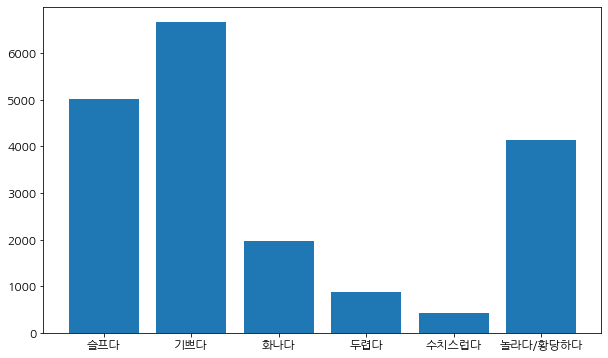

In [152]:
plt.figure(figsize=(10, 6))
rng = np.arange(len(x))
plt.bar(rng, height= np.array(y))
plt.xticks(rng,x)
plt.show()

# visualize the correlations

## make a new dataframe to get the correlations of labels 

In [80]:
cols = [col for col in df]
numeric_cols = [col for col in df if df[col].dtype.kind != 'O'][1:]
df[numeric_cols]+=2
num_df = df[numeric_cols[:-4]]

In [82]:
num_df

,기쁘다,슬프다,희망적이다,두렵다,자부를느끼다,수치스럽다,만족하다,후회하다,흥분하다,놀라다/황당하다,화나다,좋다,싫다,재미있다/웃기다,감동적이다,불쌍하다
0,6,7,6,6,6,6,4,6,6,6,6,6,7,6,6,7
1,7,6,6,6,6,6,8,6,6,6,6,8,4,6,6,6
2,4,7,5,6,6,6,4,7,7,6,6,6,7,6,6,7
3,7,6,6,6,6,6,7,6,6,6,4,7,6,6,6,4
4,4,7,5,6,5,6,5,6,7,6,7,4,8,6,6,6
5,5,8,6,6,6,6,6,6,7,6,6,4,8,6,6,6
6,5,8,6,7,6,6,5,6,6,7,6,4,7,6,6,6
7,5,7,6,6,6,6,5,6,6,6,6,5,7,6,6,6
8,8,5,8,6,8,6,7,6,6,6,6,8,5,6,6,6
9,5,7,6,6,6,6,7,6,6,6,6,5,7,6,7,6


In [86]:

corr_df=num_df.corr()

In [77]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#http://corazzon.github.io/matplotlib_font_setting


In [85]:


ll= [f.fname for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.fname ]

In [87]:
ll

['/home/domyoung/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareL.ttf',
 '/home/domyoung/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoExtraBold.ttf',
 '/home/domyoung/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjoEcoExtraBold.ttf',
 '/home/domyoung/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareB.ttf',
 '/home/domyoung/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundR.ttf',
 '/home/domyoung/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunpenR.ttf',
 '/home/domyoung/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicCoding.ttf',
 '/home/domyoung/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundL.ttf',
 '/home/domyoung/anaconda3/envs/

글꼴 설치
2012년 부터 우분투에는 나눔글꼴이 기본 포함되어 있다.

만일, 나눔 글꼴이 설치되어 있지 않다면 다음과 같이 설치할 수 있으며, 다른 ttf 폰트도 /usr/share/fonts/ 폴더에 복사하여 사용할 수 있다.

나눔 글꼴 설치
apt-get 명령으로 나눔글꼴(fonts-nanum)을 설치하고, fc-cache 명령으로 폰트 캐시 삭제

$ sudo apt-get install fonts-nanum*
$ sudo fc-cache -fv
만일 다른 ttf 폰트를 가져왔다면 다음과 같이 복사하고, fc-cache 명령으로 폰트 캐시 삭제

$ sudo cp new_font.ttf /usr/share/fonts/
$ sudo fc-cache -fv
matplotlib 나눔 글꼴을 추가
나눔 글꼴을 matplotlib 에 복사하고, matplotlib의 폰트 캐시를 삭제

$ sudo cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.4/dist-packages/matplotlib/mpl-data/fonts/ttf/
$ rm -rf /home/ubuntu/.cache/matplotlib/*

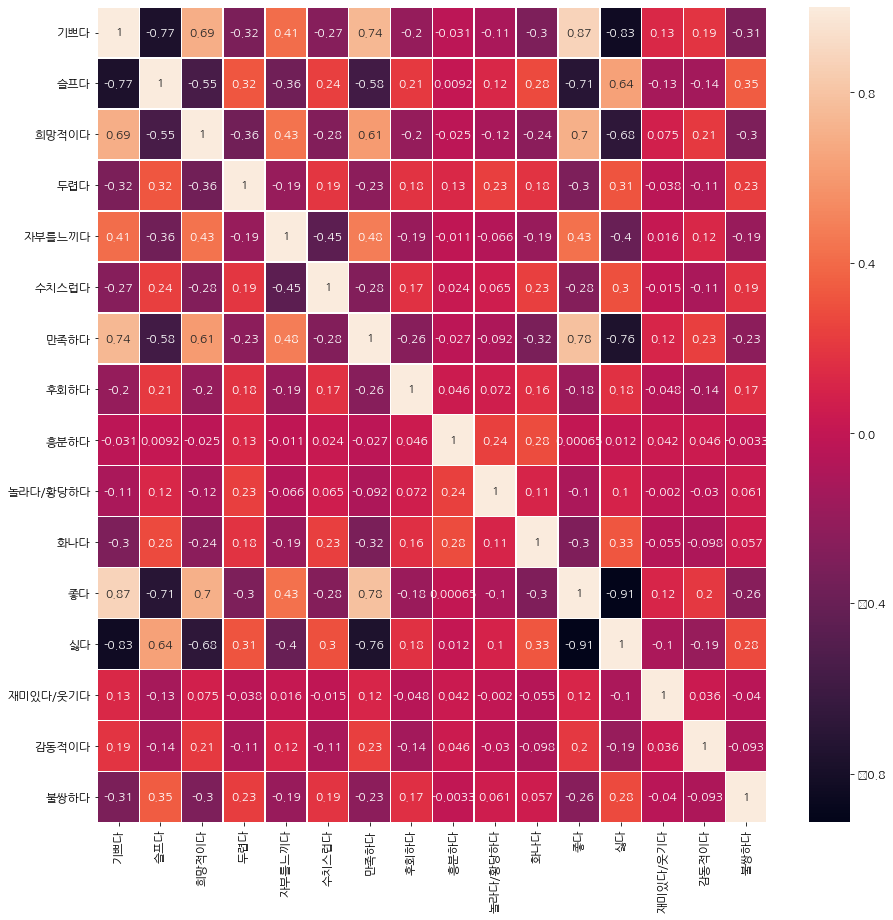

In [153]:


fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr_df,annot=True,linewidths=0.5)

## visualize the predicitions


In [184]:
import pandas as pd
#read the original test data for the text and id
df_test = pd.read_csv('test.tsv', sep='\t')


In [185]:
df_test

,내용
0,밥을 든든히 먹어서 매우 기분이 좋다.
1,졸려서 공부가 잘 안된다.
2,오늘 여자 친구랑 싸웠어.
3,오늘은 월급날이다.
4,머리가 많이 아프다.
5,주말에 여행을 간다.
6,친구들이랑 같이 놀러가기로 했다.
7,누가 갑자기 내 어깨를 쳤다.
8,어디서 갑자기 비명소리를 들었다.
9,호텔에서 조식을 먹으러 갔다.


In [182]:
#read the results data for the probabilities
df_result = pd.read_csv('test_results_epoch2+.tsv', sep='\t',header=None)
df_result

,0,1,2,3,4,5
0,0.000041,0.000133,0.000077,0.000055,0.000145,0.999549
1,0.000534,0.000260,0.998998,0.000109,0.000039,0.000061
2,0.000725,0.996831,0.001356,0.000072,0.000356,0.000661
3,0.000071,0.000168,0.000096,0.000075,0.000108,0.999483
4,0.000410,0.000074,0.999331,0.000079,0.000050,0.000057
5,0.000076,0.000085,0.000392,0.000040,0.000101,0.999305
6,0.000050,0.000108,0.000228,0.000062,0.000170,0.999382
7,0.129171,0.000392,0.869065,0.000416,0.000279,0.000676
8,0.000257,0.000076,0.999418,0.000111,0.000064,0.000073
9,0.000171,0.000131,0.000195,0.000097,0.000163,0.999244


In [186]:
#create a new dataframe
df_map_result = pd.DataFrame({
    'text': df_test['내용'],
    'label': df_result.idxmax(axis=1)})
#view sample rows of the newly created dataframe
df_map_result['label'] = df_map_result['label'].apply(lambda x: emotions[x])
df_map_result

,text,label
0,밥을 든든히 먹어서 매우 기분이 좋다.,기쁘다
1,졸려서 공부가 잘 안된다.,슬프다
2,오늘 여자 친구랑 싸웠어.,화나다
3,오늘은 월급날이다.,기쁘다
4,머리가 많이 아프다.,슬프다
5,주말에 여행을 간다.,기쁘다
6,친구들이랑 같이 놀러가기로 했다.,기쁘다
7,누가 갑자기 내 어깨를 쳤다.,슬프다
8,어디서 갑자기 비명소리를 들었다.,슬프다
9,호텔에서 조식을 먹으러 갔다.,기쁘다


In [187]:
#read the results data for the probabilities
df_result = pd.read_csv('test_results_hook.tsv', sep='\t',header=None)
#create a new dataframe
df_map_result = pd.DataFrame({
    'text': df_test['내용'],
    'label': df_result.idxmax(axis=1)})
#view sample rows of the newly created dataframe
df_map_result['label'] = df_map_result['label'].apply(lambda x: emotions[x])
df_map_result

,text,label
0,밥을 든든히 먹어서 매우 기분이 좋다.,기쁘다
1,졸려서 공부가 잘 안된다.,슬프다
2,오늘 여자 친구랑 싸웠어.,화나다
3,오늘은 월급날이다.,기쁘다
4,머리가 많이 아프다.,슬프다
5,주말에 여행을 간다.,기쁘다
6,친구들이랑 같이 놀러가기로 했다.,기쁘다
7,누가 갑자기 내 어깨를 쳤다.,놀라다/황당하다
8,어디서 갑자기 비명소리를 들었다.,슬프다
9,호텔에서 조식을 먹으러 갔다.,기쁘다


In [200]:
import urllib3
from urllib.parse import urlencode
import json
import src_tokenizer.tokenization_morp as tokenization

In [197]:
def do_lang(text):
	openApiURL = "http://10.100.1.121:8080/api/morpheme/etri"

	http = urllib3.PoolManager()
	response = http.request("POST", openApiURL, fields={'targetText': text})

	return response.data.decode()

def get_morphs(p_json):
  text = ''
  morp_list = []
  position_list = []
  for sent in p_json:

    text = sent['text']

    for morp in sent['morp']:
      morp_list.append(morp['lemma']+'/'+morp['type'])
      position_list.append(int(morp['position']))
  #pprint(text)
  #pprint(morp_list)
  #pprint("############")
  return morp_list

In [192]:

testset=["밥을 든든히 먹어서 매우 기분이 좋다.",
"졸려서 공부가 잘 안된다.",
"오늘 여자 친구랑 싸웠어.",
"오늘은 월급날이다.",
"머리가 많이 아프다.",
"주말에 여행을 간다.",
"친구들이랑 같이 놀러가기로 했다.",
"누가 갑자기 내 어깨를 쳤다.",
"어디서 갑자기 비명소리를 들었다.",
"호텔에서 조식을 먹으러 갔다.",
"아버지가 많이 아파서 병원에 갔다.",
"나는 이번주에 여행을 가서 즐겁다.",
"내가 장보러간 사이에 집이 쑥대밭이 되었다.",
"그 여자는 나를 보고 부끄러워했다.",
"나는 가족들이랑 오붓한 시간을 보냈다.",
"친구의 이상한 행동에 비위가 상했다.",
"난 항상 인기가 있는 편이다.",
"대표가 이번 프로젝트를 밀어 부쳤다.",
"집에 오자마자 아들이 투덜투덜댔다.",
"그 남자는 여자친구에게 차여서 낙심해 있었다.",
"오늘의 공연은 전체적으로 형편 없었다.",
"왜 쟤가 내 밥을 먹어?",
"넌 도대체 무슨 생각을 하는거야?",
"니 나이에 그것도 모르니?",
"커피 한잔 할래?",
"어제 하라고한거 다 했나?"]                        

In [206]:
import tensorflow as tf
tokenizer = tokenization.FullTokenizer(vocab_file='vocab.korean_morp.list',do_lower_case=False)

In [223]:
result = do_lang("넌 도대체 무슨 생각을 하는거야?")
result = json.loads(result)['sentences']
morp_tok = get_morphs(result)
answer = []
for x in morp_tok:
    answer.extend(tokenizer.tokenize(x))
print("\t".join(answer))

너/NP_	ㄴ/JX_	도대체/MAG_	무슨/MM_	생각/NNG_	을/JKO_	하/VV_	는/ETM_	거/NNB_	이/VCP_	야/EF_	?/SF_


In [212]:
answer

['졸',
 '리/VV_',
 'ㅓ',
 '서/EC_',
 '공부/NNG_',
 '가/JKS_',
 '잘/MAG_',
 '안/MAG_',
 '되/VV_',
 'ᆫ',
 '다/EF_',
 './SF_']